In [61]:
import matplotlib.pyplot as plt


def roc_plot(y_test, y_pred):
    from sklearn.metrics import roc_curve, auc
    from itertools import cycle
    
    rice = {
        0: 'Cammeo',
        1: 'Osmanscik',
    }

    plt.figure(figsize=(10, 5))

    colors = cycle(['red', 'blue'])

    for class_index, class_name in rice.items():
        class_y_test = [1 if label == class_index else 0 for label in y_test]
        class_y_pred = [pred[class_index] for pred in y_pred]

        fpr, tpr, _ = roc_curve(class_y_test, class_y_pred)
        roc_auc = auc(fpr, tpr)
        
        color = next(colors)

        plt.subplot(1, len(rice), class_index + 1)
        plt.plot(fpr, tpr, color=color, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2)
        plt.xlim([-.05, 1.05])
        plt.ylim([.05, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {class_name}')
        plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()


In [62]:
import numpy as np
import pandas as pd
import seaborn as sns

cols = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
        'Eccentricity', 'Convex_Area', 'Extent', 'Class']

data = pd.read_csv('./data/Rice_Cammeo_Osmancik.arff', names=cols)
data['Class'] = (data['Class'] == 'Osmancik').astype(int)

In [63]:
from sklearn.preprocessing import StandardScaler

x = data.iloc[:, 0:7].values
y = data.iloc[:,-1]

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [64]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=.3, random_state=42)

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=50, verbose=1,  random_state=42, oob_score=True)

rf_model.fit(x_train, y_train,)

y_pred = rf_model.predict(x_test)
y_prob = rf_model.predict_proba(x_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


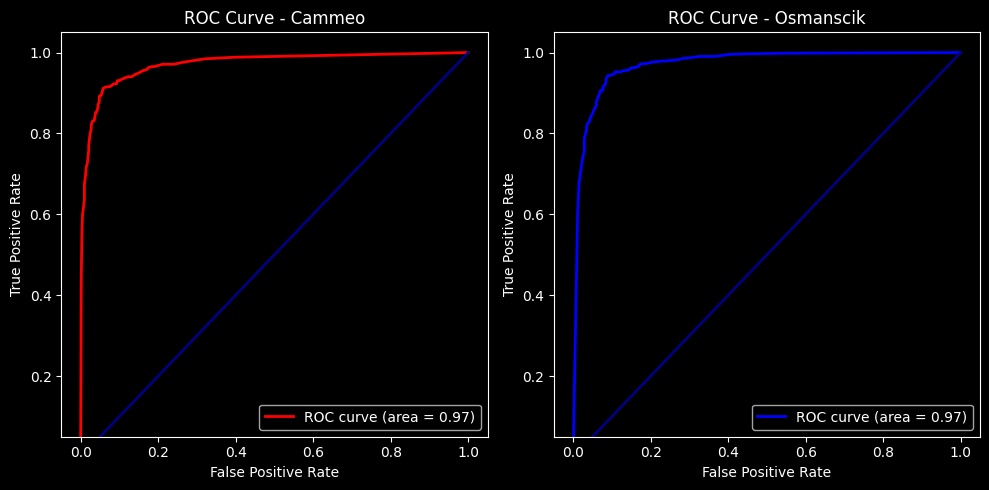

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       518
           1       0.91      0.95      0.93       625

    accuracy                           0.92      1143
   macro avg       0.92      0.92      0.92      1143
weighted avg       0.92      0.92      0.92      1143

[[463  55]
 [ 33 592]]


In [66]:
from sklearn.metrics import classification_report, confusion_matrix

roc_plot(y_test, y_prob)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))